<h1 align = 'center'> Customer Service Data Analysis </h1>

<h2 align='right'>Jim Chung</h2>
Date: 11/14/2018

# Table of Contents

- <a href="#1">1. Introduction</a>
    + <a href="#1.1"> 1.1 Variable Descriptions</a><br>
    + <a href="#1.2"> 1.2 Libraries</a><br><br>
- <a href="#2">2. Exploratory Data Analysis</a>
    + <a href="#2.1"> 2.1 Supervisor</a><br>
    + <a href="#2.2"> 2.2 Missing Values</a><br><br>
- <a href="#3">3. Hypothesis Testing</a><br><br>
- <a href="#4">4. Predictive Modeling</a>
    + <a href="#4.1"> Regression<br><br>
- <a href="#4">5. Business Conclusion</a>

<br>

# 1. Introduction <a id='1'></a>

### 1.1 Data Description <a id='1.1'></a>

The provided dataset contains the information of weekly averages of service time and quality score collected across multiple cities, clients, supervisors, and advisors. My objective is to derive business solutions & questions by examining the dataset.

### Dictionary

- Site: str [East, North or South]
- Client: str [A or B]
- Supervisor: str [12 names]
- Agent: int [1-48]
- Week: int [1-5]
- Service Time: int [402-550], 9 missing
- Quality Score: float [4.3-9.3], 6 missing

### 1.2 Library Loaded<a id='1.2'></a>

In [1]:
# Warning Ignored
import warnings
warnings.filterwarnings("always")

# Data Wrangling & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Modeling & Testing
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

from scipy.stats import bartlett, f_oneway, normaltest, kruskal, probplot

import statsmodels.api as sm
from statsmodels.formula.api import ols


matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
plt.style.use("seaborn-darkgrid")

from collections import defaultdict

%matplotlib inline

/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/an

/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/an

/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/an

/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/an

/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/jimmy/an

<br>
<br>
<br>

# 2. Exploratory Analysis <a id='2'></a>

In this chapter, I will explore the dataset to identify its unique characteristics and a room for data cleaning that can improve following analyses. Various approaches are combined to make the data more valuable and accurate. First of all, we should know what information is included in the data. 


In [2]:
df = pd.read_csv("Call Sample.csv")

In [3]:
df.Supervisor.unique()

array(['Brian', 'Jorge', 'JORGE', 'JORRGE', 'George', 'SARA', 'Sarah',
       'SARAH', 'John', 'JOHN', 'JOHNATHAN', 'Kathy', 'Eric', 'Samantha',
       'SAMANTHA', 'ADREEW', 'Andrew', 'ANDREW', 'David', 'Julie',
       'Michael', 'MICHAEL'], dtype=object)

In [4]:
# Examples of rows
np.random.seed(42)
df.sample(10)

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
24,East,A,Jorge,18,1,509.0,6.9
6,East,A,Brian,42,2,517.0,7.3
93,North,A,JOHN,1,5,455.0,8.6
109,North,A,Kathy,26,5,452.0,9.3
104,North,A,Kathy,25,5,459.0,8.8
172,South,A,Andrew,11,5,508.0,8.5
233,South,B,Michael,16,2,NaN,5.4
86,North,A,John,3,1,470.0,5.5
9,East,A,Brian,42,5,516.0,8.5
143,North,B,Samantha,6,1,467.0,6.7


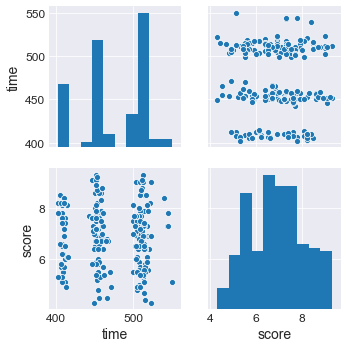

In [5]:
# Rename columns
cols = "site,client,supervisor,agent,week,time,score".split(",")
df.columns = cols

sns.pairplot(df.dropna(axis=0).loc[:, ['time', 'score']])

The historam of the service time variable suggests a strong 

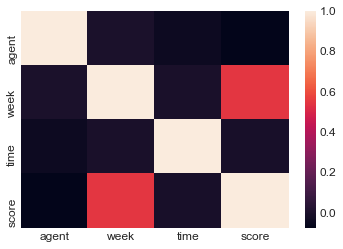

In [6]:
sns.heatmap(df.corr())

In [7]:
df.groupby('site')['score'].mean()

site
East     6.934615
North    7.041026
South    6.710256
Name: score, dtype: float64

Based on the graphs, I detect no meaningful correlation between features, except for the week and score variables. This indicates a need to consider the time information when I predicts the quality score. In a business context, there might have been a change in the service quality over time. This will be analyzed futher in the next chapter.

### 2.1 Supervisor <a id='2.1'></a>

What I observe here is that the names of the supervisors are not organized well. For example, 'JOHN' and 'John' may be the name of the same person. Also, there are several typos like "Jorrge" which should be corrected to be "Jorge." I will clean up the names.

In [8]:
# names of supervisors
print(df['supervisor'].str.lower().unique())

['brian' 'jorge' 'jorrge' 'george' 'sara' 'sarah' 'john' 'johnathan'
 'kathy' 'eric' 'samantha' 'adreew' 'andrew' 'david' 'julie' 'michael']


In [9]:
def replaceName(name):
    ''' input: series
    This function cleans up names of supervisors'''
    
    nameDic = {'jorrge':"george", "jorge":"george", "sara":"sarah", "johnathan":"john", "adreew":"andrew"}
    if name in nameDic:
        return nameDic[name]
    else:
        return name
    
df['supervisor'] = df['supervisor'].str.lower().apply(replaceName)
df['site'] = df['site'].str.lower()

In [10]:
# mean time for each supervisor
sup_mean_df = pd.DataFrame(df.groupby("supervisor")["score"].mean()).reset_index()
sup_mean_df

,supervisor,score
0,andrew,7.415000
1,brian,7.157895
2,david,7.385000
3,eric,6.355000
4,george,6.917500
5,john,7.647368
6,julie,6.045000
7,kathy,7.750000
8,michael,5.916667
9,samantha,6.410526


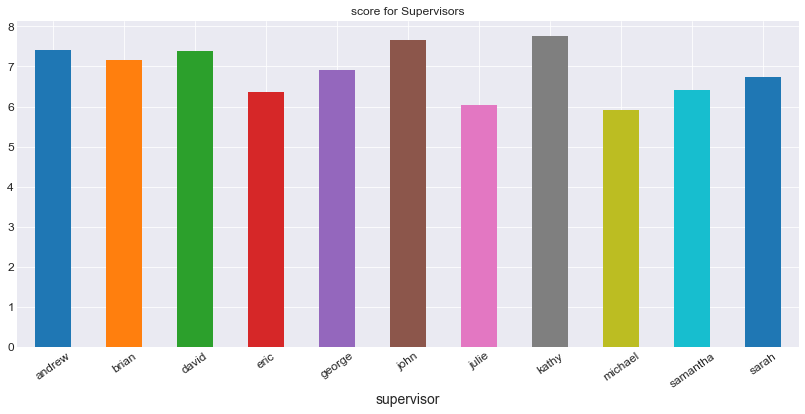

In [11]:
# Time vs. supervisor
df.groupby("supervisor")["score"].mean().plot(kind='bar', rot=35, figsize=(14,6), title="score for Supervisors")

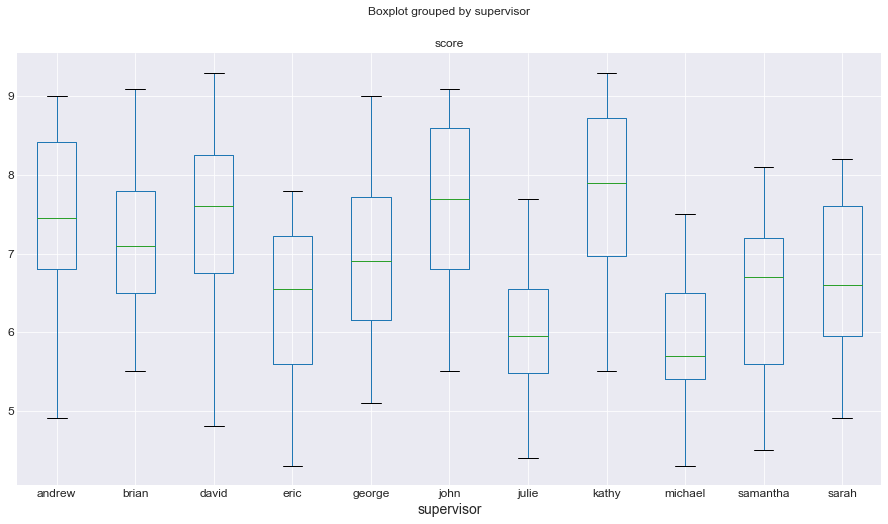

In [12]:
df.boxplot('score', by='supervisor', figsize=(15, 8))

One of the most interesting questions regarding the data is if there is a difference in the service time or quality score across the supervisors, sites, agents, and weeks. The graph above helps us look up the service time for different supervisors. Despite the seemingly significant difference, more thorough testing is required to verify my hypothesis. Anova test is closely aligned with my objective on this end. I will dive deeper into this question in chapter 3. 

### 2.2 Missing Values <a id='2.2'></a>

Most machine learning algorithms cannot handle the problem of missing values intrinsically. KNN is a notable exception, but the others are still designed for complete data. There are several ways to deal with this.

+ There are two broad classes of missing data: data missing at random, and data missing not at random. When considering what to do with our data we must keep this in mind. http://www.residentmar.io/2016/06/12/null-and-missing-data-python.html. The typology of the missing data strongly informs how best to approach dealing with it; or rather it's safer to say that if the data is missing not completely at random, you are going to need domain expertise to understand what to do with it:

+ <a href="https://statisticalhorizons.com/wp-content/uploads/MissingDataByML.pdf">"Handling Missing Data by Maximum Likelihood"</a>, Paul D. Allison

In [13]:
# How many missing values for columns
df.isnull().sum()

site          0
client        0
supervisor    0
agent         0
week          0
time          9
score         6
dtype: int64

In [14]:
# rows with missing value in 'time' column. No systematic missing.
df[df['time'].isnull()]

,site,client,supervisor,agent,week,time,score
2,east,A,brian,41,3,NaN,5.9
15,east,A,brian,44,1,NaN,7.5
38,east,A,george,20,4,NaN,7.4
59,east,B,george,48,5,NaN,7.7
90,north,A,john,4,2,NaN,7.7
121,north,B,eric,29,2,NaN,4.3
169,south,A,andrew,11,1,NaN,6.4
199,south,A,david,36,5,NaN,8.8
233,south,B,michael,16,2,NaN,5.4


In [15]:
# No record with both time and score missing
df[df['score'].isnull()]

,site,client,supervisor,agent,week,time,score
8,east,A,brian,42,4,512.0,NaN
69,east,B,sarah,23,1,413.0,NaN
99,north,A,john,3,5,452.0,NaN
159,north,B,samantha,8,5,446.0,NaN
222,south,B,michael,13,3,519.0,NaN
238,south,B,michael,15,4,508.0,NaN


### Solutions
#### 1. Dropping rows with null values

Out of various approaches, the easiest is to drop the offending entries. This solution does not require any sophisticated techniques. It is acceptable to drop the rows when the data have the sufficient number of rows for further analysis and the missing data are missing at random. In our case, the missing values seem to be missing at random ubt the total counts of the records may not be enough to afford this approach. 

In [16]:
df.dropna(axis=0, how='any').shape

(225, 7)

#### 2. Dropping features with high nullity
One of the most frequently considered methods is to drop the feature with high nullity. It is difficult to leverage the features with many null points for further analyses. This can even decrease the overall validity of our model&testing leading to the wrong conclusion. In our case, the features do not have too high proportion of null points.

In [17]:
df.drop(columns=["time", "score"]).head(3)

,site,client,supervisor,agent,week
0,east,A,brian,41,1
1,east,A,brian,41,2
2,east,A,brian,41,3


#### 3. Simple imputation

Rather than excluding the rows or columns with missing values, we can simply replace the null points with the median o r mean of the columns. Again, this imputation needs a careful approach as the missing values should be missing at random for the imputation to be unbiased. It seems quite reasonable to apply this technique as the given dataset shows no significant trend.

In [18]:
imputer = Imputer(strategy="median")

df_impute = df
df_impute.loc[:, ['time', 'score']] = imputer.fit_transform(df.loc[:, ["time", 'score']])
df_impute.head(3)

,site,client,supervisor,agent,week,time,score
0,east,A,brian,41,1,509.0,6.5
1,east,A,brian,41,2,505.0,6.9
2,east,A,brian,41,3,470.0,5.9


#### 4. Model imputation
Finally, here is a trick. We can build a model to fix missing values so that the values can be used again for another machine learning model. The columns with missing data become the target variable and existing data are taken in as predictor variables. I will try to build a regression model to apply this approach. The statistical implication underlying this method is to decrease the bias using predictive models.

In [19]:
def get_dummy(df, columns):
    temp_df = df.copy()
    for col in columns:
        for elem in df[col].unique():
            temp_df[str(elem)] = (df[col] == elem).astype("int")
        temp_df.drop(columns=col, inplace=True)
    return temp_df


def model_impute(model, target, df):
    
    pred = []
    tar = []
    
    df_dummy = get_dummy(df, ['site', 'supervisor', 'agent', 'client'])
    df_no_na = df_dummy.dropna(axis=0)
    
    for t in target:
        pred.append(df_no_na.drop(columns=target).values)
        tar.append(df_no_na[t].values)

    reg = defaultdict(model)
    
    for i in range(len(pred)):
        reg[i].fit(pred[i], tar[i])
    
    for i, t in enumerate(target):
        df[t] = df.apply(lambda row: 
                reg[i].predict(df_dummy.drop(columns=target).iloc[row.name,:].values.reshape(1, -1))[0] 
                if np.isnan(row[t]) else row[t], axis=1)

In [20]:
# Random Forest was applied as the features include many nominal values.(increasing the dimensions)
model_impute(RandomForestRegressor, ['time', 'score'], df)

In [21]:
# No more missing entries
df.isnull().sum()

site          0
client        0
supervisor    0
agent         0
week          0
time          0
score         0
dtype: int64

From now on, I will use this model-imputed dataset.

<br>
<br>

# 3. Hypothesis Testing <a id='3'></a>

### Anova Test 
Q: Are there significant factors that affect the service time or quality? 

The answer to this question can be derived by observational hypothesis testing. The given dataset can be considered a multiple-way between-subjects design with Service Time and Quality Score being the reponses. The observed factors are as follows.

+ Site
+ Supervisor
+ Agent
+ Week
+ Client

In this chapter, I will examine whether the responses satisfy the requirements for Anova test. Then I will try to figure out effects of a few factors on the response. 

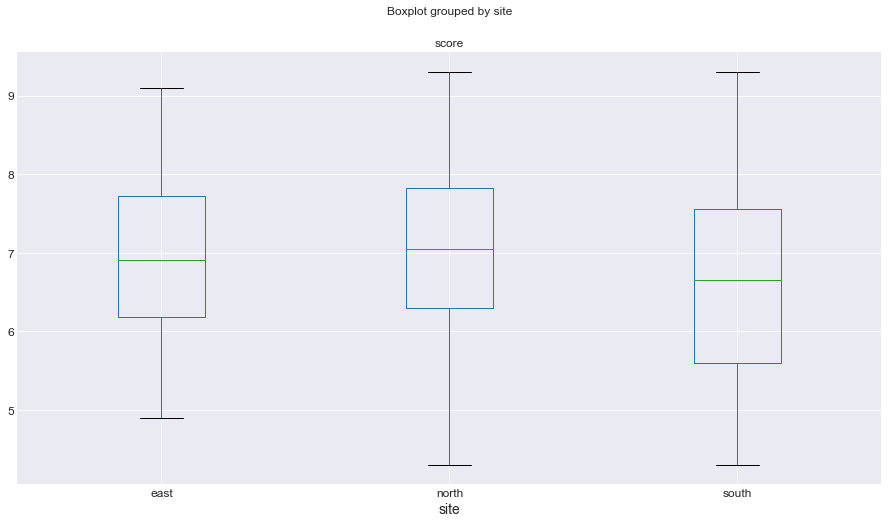

In [22]:
df.boxplot('score', by='site', figsize=(15, 8))
 
grps = pd.unique(df.site.values)
grp_df = {grp:df['score'][df.site == grp] for grp in grps}
 
k = len(pd.unique(df.client))  # number of conditions
N = len(df.values)  # conditions times participants
n = df.groupby('site').size() #Participants in each condition

In [23]:
# Number of records for each Site group
print(n)

site
east     80
north    80
south    80
dtype: int64


In [24]:
# homoscedasticity test is passed
print(bartlett(list(grp_df.values())[0], list(grp_df.values())[1], list(grp_df.values())[2]))

# Normality test
print(normaltest(grp_df['east']))
print(normaltest(grp_df['north']))
print(normaltest(grp_df['south']))

BartlettResult(statistic=3.321095795516697, pvalue=0.1900348319144327)
NormaltestResult(statistic=6.815335088715069, pvalue=0.03311835745789304)
NormaltestResult(statistic=1.8908104251769648, pvalue=0.38852210495248474)
NormaltestResult(statistic=5.175110275977933, pvalue=0.07520367812475857)


In [25]:
f_oneway(grp_df['east'], grp_df['north'], grp_df['south'])

F_onewayResult(statistic=1.494945612470167, pvalue=0.22636775250961144)

According to this quick one-way Anova test result, there is no significant difference in Quality Score across the three groups of Site. Anova test, however, requires relatively unrealistic conditions for its validity to hold. These are

    1. Normality of sample data
    2. Homoscedasticity
    3. Stochastic independence

It is not always the case that the dataset meets these requirements. Hence, Kruskal-Wallis H-test is often preferred with some loss of power.

In [26]:
# Test whether the effect of Supervisor exists on Quality Score
grps = pd.unique(df.supervisor.values)
grp_df = {grp:df['score'][df.supervisor == grp] for grp in grps}

kruskal(*list(grp_df.values()))

KruskalResult(statistic=51.40014393743209, pvalue=1.4732197737476276e-07)

In [27]:
df.groupby('supervisor')['score'].mean()

supervisor
andrew      7.4150
brian       7.1450
david       7.3850
eric        6.3550
george      6.9175
john        7.6100
julie       6.0450
kathy       7.7500
michael     6.0150
samantha    6.4350
sarah       6.7550
Name: score, dtype: float64

The test results strongly indicates that Supervisor is a significant factor affecting the quality score variable under the 99% confidence level. This test can be done in other ways for various business purposes.

<br>
<br>

# 4. Predictive Modeling <a id='4'></a>

Finally, I arrived at this step where machine learning models including supervised & unsupervised techniques come into play. The size of the sample data is quite small to apply more flexible models such as neural network. It might be more reasonable to try robust models with strong regularization and examine its business implications

### Regression <a id='4.1'></a>
#### Can I predict the Service Time or Quality Score from other features?

In this regression problem, our approaches can be divided into two categories. First, the time dependence across Week variable can be considered. Then, it becomes a good example of time series analysis. Traditional approaches, e.g. ARMA, ARIMA, or SARIMA, or more sophisticated ones like LSTM could be readily applied on Python. However, as we have only 5 time points, this is not feasible with this small dataset. Hence, I will attempt to build a XGboosting model. This model ensembles decision trees and has achieved popularity recently for its robustness and less susceptibility to overfitting. 

In [28]:
# Response: Quality Score
df_dummy = get_dummy(df, ['site', 'supervisor', 'agent', 'client'])
X = df_dummy.drop(columns=["score"]).values
y = df_dummy["score"].values.reshape(-1, 1)

# Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# regression fit
reg = XGBRegressor()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

# metric
params = {'max_depth':[1, 3, 5], 'n_estimators':[50, 100, 150], 'gamma':[0, 0.1, 0.2]}
grid = GridSearchCV(reg, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Best estimator
best_reg = grid.best_estimator_

{'gamma': 0, 'max_depth': 1, 'n_estimators': 100}


Text(0,0.5,'Neg_Mean_Score')

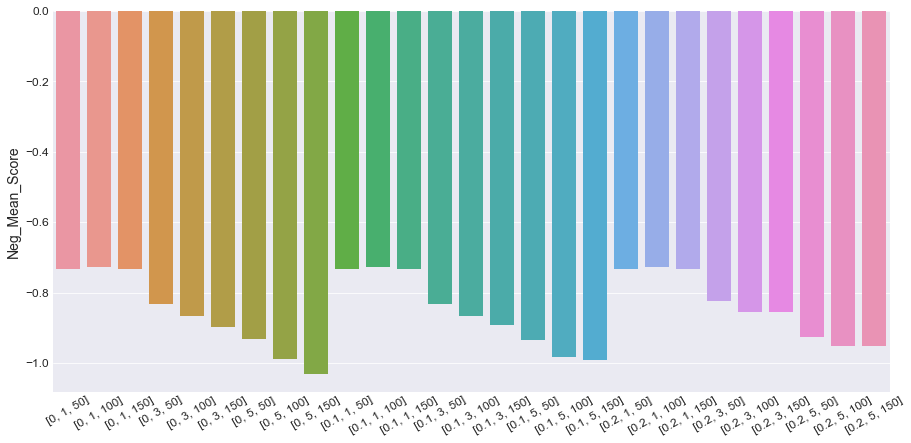

In [29]:
cvrs = grid.cv_results_
mean_scores = []
params = []

for mean_score, param in zip(cvrs['mean_test_score'], cvrs['params']):
    mean_scores.append(mean_score)
    params.append(str(list(param.values())))
print(grid.best_params_)

plt.figure(figsize=(15,7))
ax = sns.barplot(params, mean_scores)
ax.set_xticklabels(params, rotation=30)
ax.set_ylabel("Neg_Mean_Score")

Text(0.5,1,'Quality Score True vs. Pred')

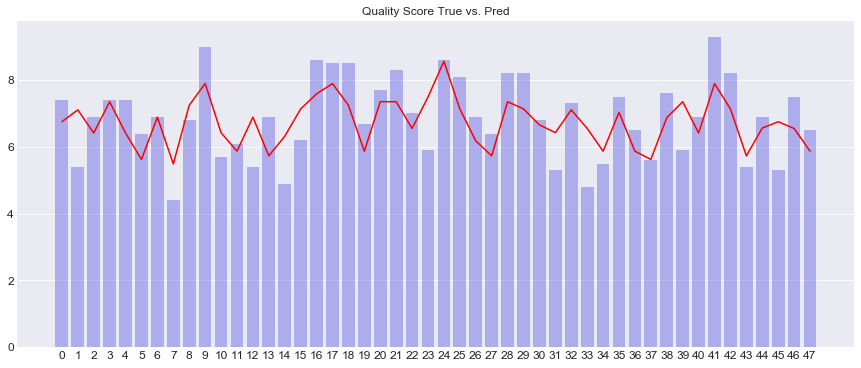

In [30]:
# Visualize the predictions
pred = best_reg.predict(X_test)
plt.figure(figsize=(15, 6))
sns.barplot(np.arange(y_test.shape[0]), y_test.squeeze(), color='blue', alpha=0.3)
sns.lineplot(np.arange(len(pred)), pred, color='red')
plt.title("Quality Score True vs. Pred")

Text(0,0.5,'feature importance')

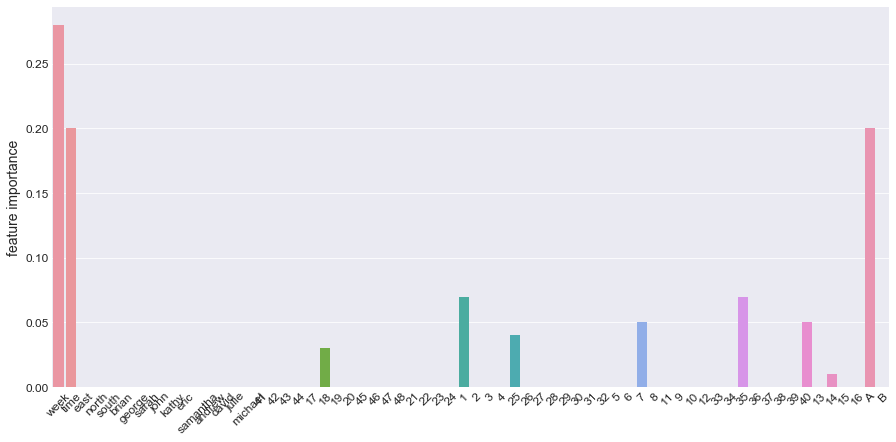

In [31]:
plt.figure(figsize=(15,7))
ax = sns.barplot(df_dummy.drop(columns=['score']).columns, best_reg.feature_importances_)
ax.set_xticklabels(df_dummy.drop(columns=['score']).columns, rotation=45)
ax.set_ylabel("feature importance")

In the process, I observe several interesting factors.

+ The best parameter has only one maximum depth. Strong regularization is required as the size of the data is small
+ The most important feature turns out to be the Week variable. It is strongly suggested that there was a change in the service quality over the given period. Also, if there was more time points, time series modeling would have been meaningful.
+ The prediction is quite close to the true values. Considering the number of the records is no more than 300, it will be possible to build very accurate model with millions of data points. It also allows Asurion to strenghten the factors that increase the quality and avoid undesirable factors. 
+ Asurion can build a bonus system for those who outperform the prediction model. That means the supervisor or agent beat the expectation of the model. Definitely, more data are needed to make the system actually work.


<br>
<br>

# 5. Business Conclusion <a id='5'></a>

+ Suggestion 1: Use the data to evaluate supervisors, agents, and regional offices.
+ Suggestion 2: Identify the factors that affect the quality of the service either positively or negatively.
+ Suggestion 3: Predict the service scores before allocating resources and make business decisions
+ Suggestion 4: Use the prediction to make future investments or products